In [24]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./../../designer/script/')
sys.path.append('./../../designer/')
sys.path.append('./../../')


import numpy as np
import matplotlib.pyplot as plt
import copy

from film import TwoMaterialFilm
from spectrum import Spectrum
from design import DesignForSpecSimple
from optimizer.needle_insert import make_test_insert_film, get_insert_grad

def plot_insert_gradient(film, target_reflect_spec, search_pts=200):
    film_insert = copy.deepcopy(film)

    film_before = copy.deepcopy(film)
    film_before_insert = copy.deepcopy(film_insert)

    design = DesignForSpecSimple([target_reflect_spec], film)
    design.adam_gd(1000, alpha=0.1)
    print(film.get_d())
    film.remove_negative_thickness_layer()
    film_insert = copy.deepcopy(film)

    return film_before, film_before_insert, film, film_insert

wls = np.linspace(500, 1000, 500)
target_reflect_spec = Spectrum(0., wls, np.ones(wls.shape[0], dtype='float'))

# d = np.array([2000])
# film = TwoMaterialFilm('TiO2', 'SiO2', 'SiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

# d = np.array([2000])
# film = TwoMaterialFilm('SiO2', 'TiO2', 'TiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

# d = np.array([2000])
# film = TwoMaterialFilm('SiO2', 'TiO2', 'SiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

# d = np.array([600, 600, 600])
# film = TwoMaterialFilm('TiO2', 'SiO2', 'SiO2', d)
# plot_insert_gradient(film, target_reflect_spec)

d = np.array([100.] * 10)
film = TwoMaterialFilm('SiO2', 'TiO2', 'SiO2', d)
films = plot_insert_gradient(film, target_reflect_spec)

# conclusion: big insertion gradeint ON THE INTERFACE. in the middle, should be some

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:09<00:00, 101.55it/s]

[158.91025073  65.65157876  94.49201137  64.07033868 110.07845487
 100.32319442 117.8202034  109.24353603 127.1466661   86.8667188 ]


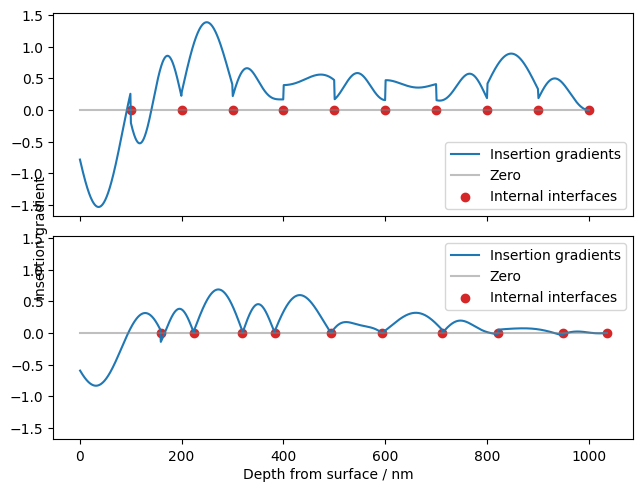

In [30]:

def plot(film_before, film_before_insert, film, film_insert, target_reflect_spec, search_pts=200):
    film_before_insert = copy.deepcopy(film_before_insert)
    insert_idx = make_test_insert_film(film_before_insert, search_pts)
    grad = get_insert_grad(film_before_insert, [target_reflect_spec])

    fig, (ax, ax_after) = plt.subplots(2, 1, sharex=True, sharey=True)
    ax.plot([film_before_insert.get_d()[:i].sum() for i in insert_idx], grad[insert_idx], label='Insertion gradients')
    ax.plot([0, film_before_insert.get_d().sum()], [0, 0], c='grey', alpha=0.5, label='Zero')
    ax.scatter([film_before.get_d().cumsum()], np.zeros_like(film_before.get_d().cumsum()), c='C3', alpha=1, label='Internal interfaces')
    ax.legend()
    film_insert = copy.deepcopy(film_insert)
    insert_idx = make_test_insert_film(film_insert, search_pts)
    grad = get_insert_grad(film_insert, [target_reflect_spec])

    ax_after.plot([film_insert.get_d()[:i].sum() for i in insert_idx], grad[insert_idx], label='Insertion gradients')
    ax_after.plot([0, film_insert.get_d().sum()], [0, 0], c='grey', alpha=0.5, label='Zero')
    ax_after.scatter([film.get_d().cumsum()], np.zeros_like(film.get_d().cumsum()), c='C3', alpha=1, label='Internal interfaces')
    ax_after.legend()

    fig.text(0.5, 0, 'Depth from surface / nm', ha='center')
    fig.text(0.04, 0.5, 'Insertion gradient', va='center', rotation='vertical')
    
    fig.tight_layout()
    fig.savefig('./images/needle_grad_before_vs_after_gd.pdf')
plot(*films, target_reflect_spec)